In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


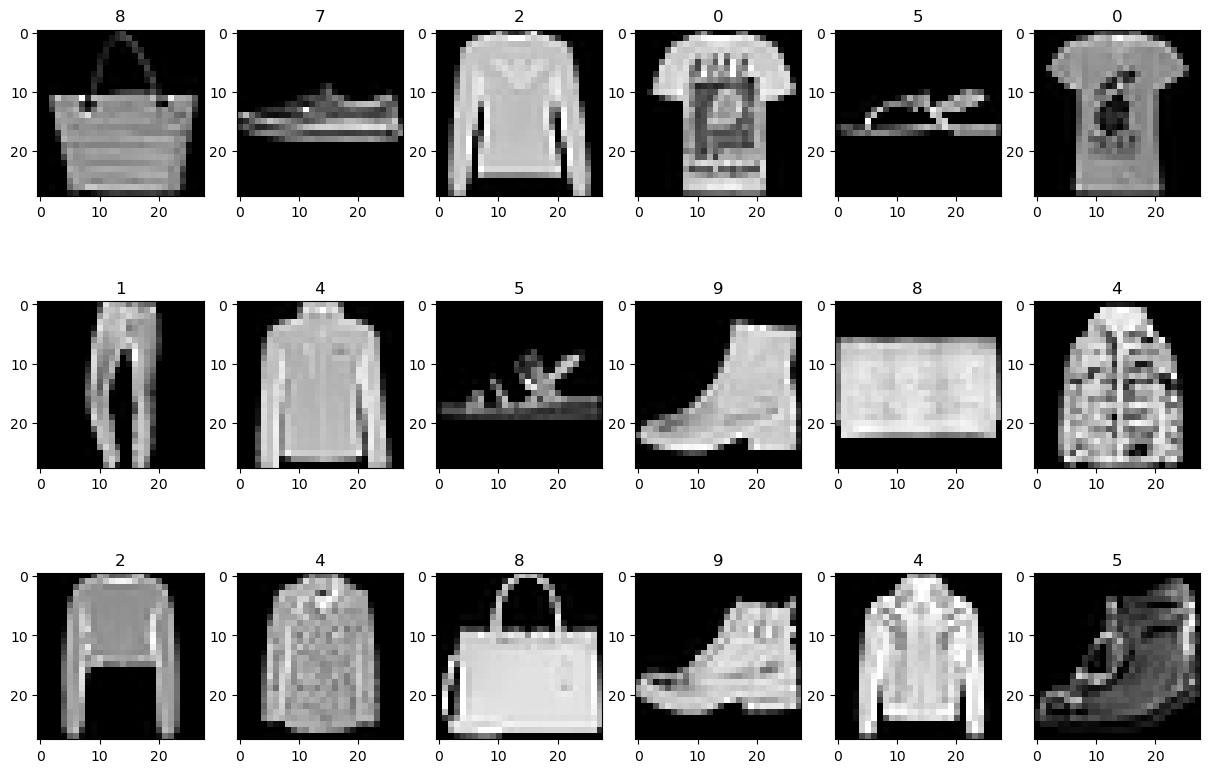

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

**Building the Classifier**

We are now going to build the baseline classifier that will used throughout this homework.

In [5]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [6]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7405 - loss: 0.7383 - val_accuracy: 0.8042 - val_loss: 0.5444
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8270 - loss: 0.4854 - val_accuracy: 0.8269 - val_loss: 0.4861
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8435 - loss: 0.4424 - val_accuracy: 0.8367 - val_loss: 0.4637
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8522 - loss: 0.4185 - val_accuracy: 0.8443 - val_loss: 0.4455
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8572 - loss: 0.4013 - val_accuracy: 0.8495 - val_loss: 0.4323
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8619 - loss: 0.3884 - val_accuracy: 0.8517 - val_loss: 0.4262
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8651 - loss: 0.3788 - val_accuracy: 0.8572 - val_loss: 0.4129
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8676 - loss: 0.3700 - 

Train Acc      0.9216166734695435
Validation Acc 0.8852999806404114


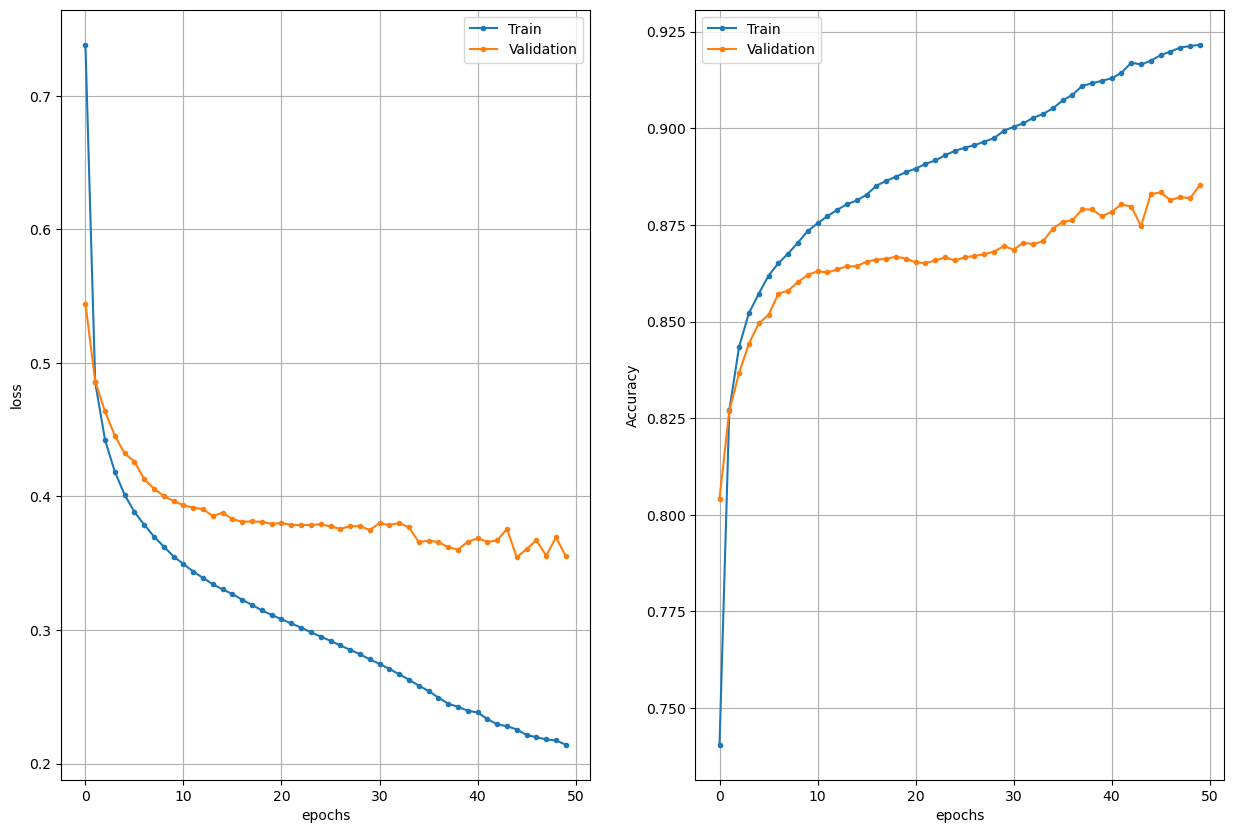

In [8]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

**Combat the Overfitting!**

 Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,

Dropout
Batch normalization
Weight regularization
Data augmentation
Early stopping
Pooling
Reducing the number of parameters (the size of the network)
...

In [9]:
# Імпортуємо колбек EarlyStopping та шар Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation  # Import Activation layer

# Змінюємо форму даних, щоб включити вимір каналу (ширина, висота, канали)
# Базова модель працювала неявно, але шари Conv2D очікують цього.
# Також знову завантажуємо дані на випадок, якщо вони були нормалізовані на місці.
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.fashion_mnist.load_data()
x_train2 = x_train2 / 255.0
x_tes2 = x_test2 / 255.0

x_train2 = np.expand_dims(x_train2, -1)
x_test2 = np.expand_dims(x_test2, -1)

print('Train set shape:', x_train2.shape)
print('Test set shape:', x_test2.shape)
print('---')

Train set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)
---


**Визначення модифікованої моделі**

Цей блок визначає нову архітектуру моделі з додаванням MaxPooling2D, BatchNormalization, Dropout та зменшеним шаром Dense. Він також виводить model.summary() та порівнює кількість параметрів з базовою моделлю.

In [10]:
# --- Модифікований класифікатор ---
# Додєно MaxPooling для зменшення параметрів, BatchNormalization для стабільності
# і запроваджено Dropout для регуляризації. Також ми зменшуємо розмір Dense шару.

inputs2 = Input(shape=(28, 28, 1))

# Block 1: Conv -> BN -> ReLU -> Pool
net2 = Conv2D(32, kernel_size=(3, 3), padding='same', use_bias=False)(inputs2) 
net2 = BatchNormalization()(net2)
net2 = Activation('relu')(net2)
net2 = MaxPooling2D(pool_size=(2, 2))(net2) # ADDED POOLING

# Flatten the features
net2 = Flatten()(net2)

# Block 2: Dense -> BN -> ReLU -> Dropout
net2 = Dense(64, use_bias=False)(net2) #зменшено DENSE SIZE (128 -> 64)
net2 = BatchNormalization()(net2)
net2 = Activation('relu')(net2)
net2 = Dropout(0.5)(net2) #додано DROPOUT

# Output layer
outputs2 = Dense(10, activation="softmax")(net2)

model2 = Model(inputs2, outputs2)
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       401,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,730 (1.54 MB)

 Trainable params: 402,538 (1.54 MB)

 Non-trainable params: 192 (768.00 B)

**1Тренування мережі**

Цей блок налаштовує EarlyStopping, компілює модель і запускає процес тренування за допомогою model.fit(), передаючи колбек для ранньої зупинки.

In [11]:
# --- Навчання мережі ---

epochs = 50
batch_size = 64


# Використовуємо EarlyStopping, щоб уникнути надмірного навчання.
# Він спостерігає за втратою на валідації і зупиняє навчання, якщо вона не покращується протягом 5 епох.
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True # This keeps the weights from the best epoch
)

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Передаєиомо колбек до методу .fit()
history2 = model2.fit(
    x_train2,
    y_train2,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test2, y_test2),
    callbacks=[early_stopping_callback] # Add the callback here
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8328 - loss: 0.5073 - val_accuracy: 0.8160 - val_loss: 45.7186
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8766 - loss: 0.3530 - val_accuracy: 0.8042 - val_loss: 55.3441
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8897 - loss: 0.3104 - val_accuracy: 0.8345 - val_loss: 49.2809
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8991 - loss: 0.2869 - val_accuracy: 0.8317 - val_loss: 48.4777
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9046 - loss: 0.2661 - val_accuracy: 0.8153 - val_loss: 66.6732
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9096 - loss: 0.2493 - val_accuracy: 0.8204 - val_loss: 62.3938


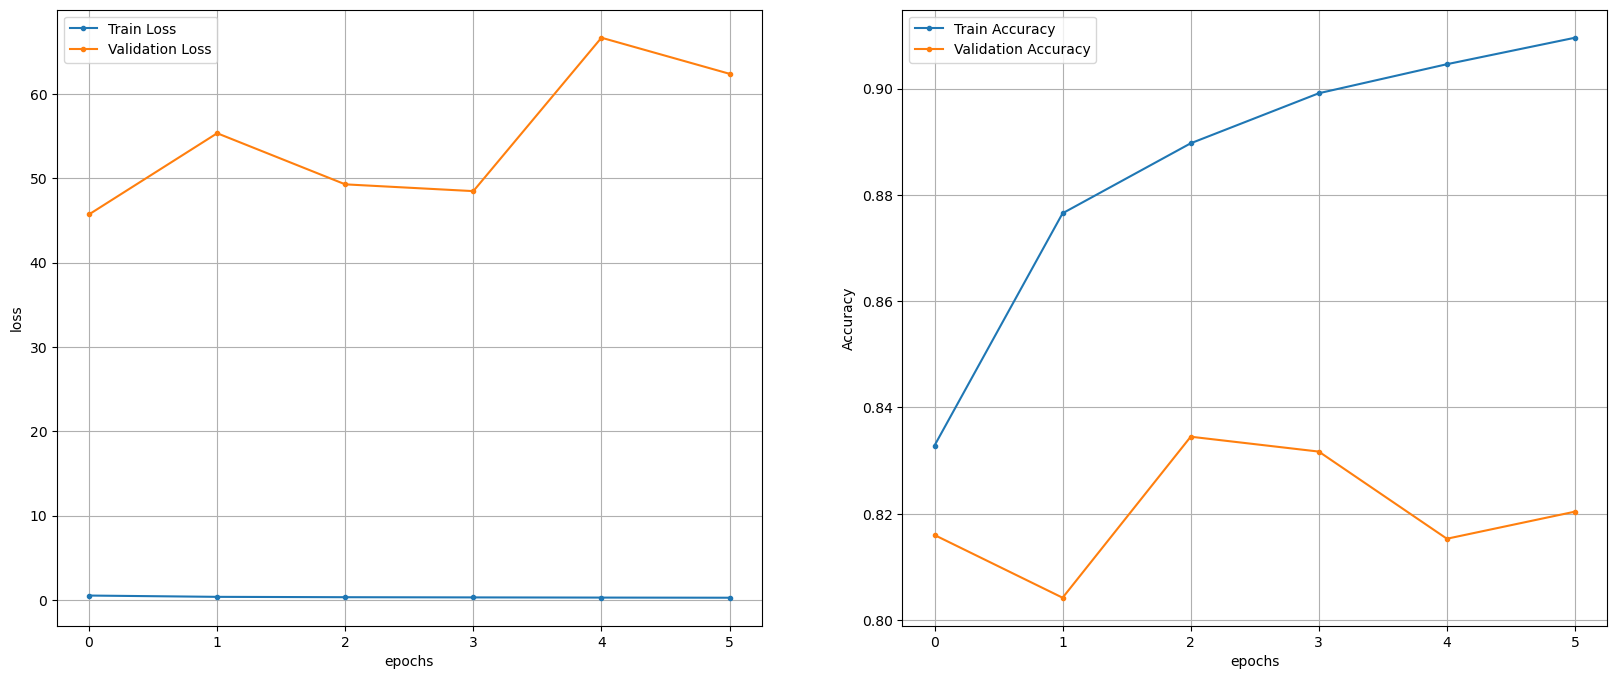

Training stopped after 6 epochs.
Best epoch was 1 with Validation Accuracy: 81.60%
Constraint (Validation Acc > 91%) satisfied: NO


In [12]:
# --- Show the results ---

def plot_history2(history2):
    h = history2.history
    epochs_run = len(h['loss']) # фактична кількість запущених епох
    epoch_range = range(epochs_run)

    plt.figure(figsize=(20, 8)) # Робимо фігуру трохи ширшою
    plt.subplot(121)
    plt.plot(epoch_range, h['loss'], '.-', label='Train Loss')
    plt.plot(epoch_range, h['val_loss'], '.-', label='Validation Loss')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(epoch_range, h['accuracy'], '.-', label='Train Accuracy')
    plt.plot(epoch_range, h['val_accuracy'], '.-', label='Validation Accuracy')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Знаходимо та виведимо найкращу точність перевірки, досягнуту під час навчання
    # np.argmin знаходить індекс мінімальної втрати валідації (найкраща епоха)
    best_epoch = np.argmin(h['val_loss'])
    best_val_acc = h['val_accuracy'][best_epoch]

    print(f'Training stopped after {epochs_run} epochs.')
    print(f'Best epoch was {best_epoch + 1} with Validation Accuracy: {best_val_acc * 100:.2f}%')

    if best_val_acc > 0.91:
        print('Constraint (Validation Acc > 91%) satisfied: YES')
    else:
        print('Constraint (Validation Acc > 91%) satisfied: NO')

plot_history2(history2)

In [13]:
# --- Модель V2: Додаємо ще один блок Conv/Pool ---

inputs3 = Input(shape=(28, 28, 1))

# Block 1: Conv -> BN -> ReLU -> Pool
net3 = Conv2D(32, kernel_size=(3, 3), padding='same', use_bias=False)(inputs3)
net3 = BatchNormalization()(net3)
net3 = Activation('relu')(net3)
net3 = MaxPooling2D(pool_size=(2, 2))(net3) # Розмір виходу: 14x14x32

# Block 2: Conv -> BN -> ReLU -> Pool
net3 = Conv2D(64, kernel_size=(3, 3), padding='same', use_bias=False)(net3) # Додаємо фільтрів
net3 = BatchNormalization()(net3)
net3 = Activation('relu')(net3)
net3 = MaxPooling2D(pool_size=(2, 2))(net3) # Розмір виходу: 7x7x64

# Flatten the features
net3 = Flatten()(net3) # Вхід у Dense буде 7*7*64 = 3136

# Block 3: Dense -> BN -> ReLU -> Dropout
net3 = Dense(64, use_bias=False)(net3) # Залишаємо невеликий Dense шар
net3 = BatchNormalization()(net3)
net3 = Activation('relu')(net3)
net3 = Dropout(0.5)(net3) # Залишаємо Dropout

# Output layer
outputs3 = Dense(10, activation="softmax")(net3)

model3 = Model(inputs=inputs3, outputs=outputs3)
model3.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       200,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,714 (862.16 KB)

 Trainable params: 220,394 (860.91 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8431 - loss: 0.4734 - val_accuracy: 0.8552 - val_loss: 0.4013
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8903 - loss: 0.3187 - val_accuracy: 0.8758 - val_loss: 0.3359
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9026 - loss: 0.2813 - val_accuracy: 0.8915 - val_loss: 0.2997
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9114 - loss: 0.2523 - val_accuracy: 0.9035 - val_loss: 0.2601
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9183 - loss: 0.2320 - val_accuracy: 0.9082 - val_loss: 0.2568
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9233 - loss: 0.2144 - val_accuracy: 0.9036 - val_loss: 0.2544
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9273 - loss: 0.2000 - val_accuracy: 0.8989 - val_loss: 0.2851
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9327 - loss: 0.1861 - 

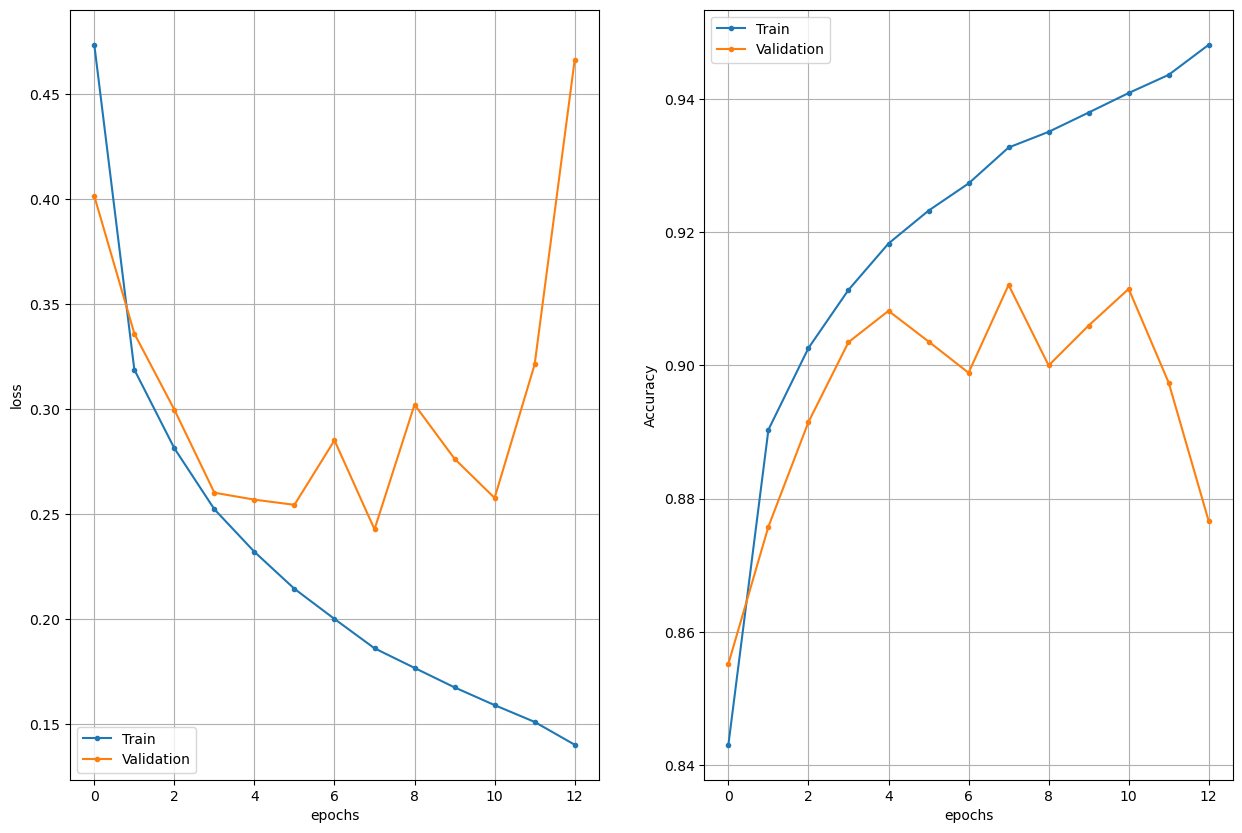

In [14]:

# --- Тренування мережі V2 (використовуємо ті ж налаштування) ---

epochs = 50
batch_size = 64

# Використовуємо той самий EarlyStopping колбек
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5, # Можна спробувати збільшити до 7-10, якщо навчання зупиняється занадто рано
    restore_best_weights=True
)

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3 = model3.fit(
    x_train, # Переконуємось, що x_train/x_test мають правильну форму (W, H, C)
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping_callback]
)

# --- Відображення результатів V2 (використовуємо ту саму функцію plot_history) ---
print("\n--- Результати Моделі V2 ---")
plot_history(history3)

**What have you done in order to improve the performance?**

В порівнянні із початковою моделлю:
 - доадно два шари MaxPooling2D (після кожного згорткового шару). Це зменшило  розміри карт ознак перед шарои Flatten. Це сильно скоротило загальну кількість параметрів моделі. Це допомогло виділити важливі ознаки, і "прибрало" неважливі, які, імовірно, і були причиною перенавчання моделі.
 - додано ще одну Conv2D->BanchNormalization->Activation('ReLu')->MaxPooling2D. Таким чином ознаки отримали ієрархію за складністю.
 - BanchNormalization після кожного згорткового шару (перед Activation) для стабілізації і прискорення процесу навчання.
 - Dropout(0.5) після Dense - рандомно відключаємо частину нейронів для отримання більш рівномірного навчання нейромережі та, відповідно уникнення перенавчання якихось окремих нейронів, надаючи їм занадто великої важливости;
 - Зменшення шару Dense (із 128 до 64 нейронів) зменшило кількість параметрів, т.т. зменшило ризик перенавчання.
 - EarlyStopping автоматично зупиняє процес навчання якщо val_loss не зменшується протягом 5-ти епох.

**Have you tried configurations that did not work out?**

Перша спроба модифікації model2 було додано MaxPooling2D? BatchNormalization та Dropout. Показала значне перенавчання та досягла тільки 81% точності на валідації, що мало, в порівнянні з цілевими 91%
Судячи з усього, Dropout не дуже допоміг, оскільки параметрів було аж занадто багато, щоб Dpropout мав хоч якийсь суттєвий вплив. А сильно задирати Dropout може призвести до недонавчання.